In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Guardamos posiciones y masas de las galaxias de gadget

In [2]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import barstrength2 as strng

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')
vector = ('00','01','03')

#path = 'home/ornela/SimCLUES/'
path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]


path = '/mnt/is2/alejandro/ornella/'

snap = h5py.File(path + 'outputs_1/snap_496.h5py', 'r')

for i in range(0,3):
    cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value

    pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'].value

    z = a0/aexp[0] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[0]/h
    ystr = (pstr[:,1]-cm[1])*aexp[0]/h
    zstr = (pstr[:,2]-cm[2])*aexp[0]/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp[0]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[0]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[0]) + Ht *zstr/1000.

#----------------------masas----------------------------
    mstr = mstr/h

    r200 = r200*aexp[0]/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    cincuenta, = np.where(razon < 0.5)

    r50 = r_sort[cincuenta][-1]             

#--------------------------------------------         
    veloc,=np.where(r<r50)

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp[0])

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2)
    
#     corte, = np.where(r < 3*aexp[0])

#     A2max, rmax, phimax = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)

#     xx = xn*cos(phimax)+yn*sin(phimax)
#     yy = xn*-sin(phimax)+yn*cos(phimax)
#     zz = zn

    limit_str = np.where(rn < r200)
    
    pos=np.ndarray([4,np.size(xn[limit_str])])
    pos[0,:]=xn[limit_str]
    pos[1,:]=yn[limit_str]
    pos[2,:]=zn[limit_str]
    pos[3,:]=mstr[limit_str]
    
#     pos=np.ndarray([4,np.size(xx)])
#     pos[0,:]=xx
#     pos[1,:]=yy
#     pos[2,:]=zz
#     pos[3,:]=mstr

    np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_pos-mass.dat', pos, fmt='%12.6f')
    
##pos-mass2.dat guarda los datos rotados el angulo phi (el semieje mayor esta alineado con el eje x)
##pos-mass3.dat guarda las posiciones de las particulas pero con la rotacion en 3*aexp en lugar de r90

### Guardamos los datos de masa y posicion de las particulas(estrellas) de gasoline

In [3]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import sphviewer as sph
import numpy as np
import barstrength2 as strng


a0=1
vector2 = ('M31','MW','M33')
vector = (1,2,4)

#path = 'home/ornela/SimCLUES/'
path = '/mnt/sersic2/omarioni/'

snap = h5py.File(path + 'Gasoline/outputs2/snap_1024.h5py', 'r')

for i in range(0,3):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value
    h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value

    pstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[:,0]-cm[0]
    ystr = pstr[:,1]-cm[1]
    zstr = pstr[:,2]-cm[2]
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0]
    v_y = vel[:,1]
    v_z = vel[:,2]

#----------------------masas----------------------------
    r200 = r200*aexp
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    cincuenta, = np.where(razon < 0.5)

    r50 = r_sort[cincuenta][-1]
#------------------masa total en r200 (Mvir)--------------------------         
    veloc,=np.where(r<r50)

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp)

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2)

#     corte, = np.where(r < 3*aexp)

#     A2max, rmax, phimax = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)

#     xx = xn*cos(phimax)+yn*sin(phimax)
#     yy = xn*-sin(phimax)+yn*cos(phimax)
#     zz = zn

    limit_str = np.where(rn < r200)
    
    pos=np.ndarray([4,np.size(xn[limit_str])])
    pos[0,:]=xn[limit_str]
    pos[1,:]=yn[limit_str]
    pos[2,:]=zn[limit_str]
    pos[3,:]=mstr[limit_str]
    
#     pos=np.ndarray([4,np.size(xx)])
#     pos[0,:]=xx
#     pos[1,:]=yy
#     pos[2,:]=zz
#     pos[3,:]=mstr

    np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_pos-mass.dat', pos, fmt='%12.6f')
    
##pos-mass2.dat guarda los datos rotados el angulo phi (el semieje mayor esta alineado con el eje x)
##pos-mass3.dat guarda las posiciones de las particulas pero con la rotacion en 3*aexp en lugar de r90

In [13]:
import sphviewer as sph
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

#path = 'home/ornela/PYTHON/'
path = '/home/omarioni/'

M31_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_pos-mass.dat')
x_M31gd = M31_gd[0,:]
y_M31gd = M31_gd[1,:]
z_M31gd = M31_gd[2,:]
m_M31gd = M31_gd[3,:]

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_pos-mass.dat')
x_MWgd = MW_gd[0,:]
y_MWgd = MW_gd[1,:]
z_MWgd = MW_gd[2,:]
m_MWgd = MW_gd[3,:]

M33_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M33_pos-mass.dat')
x_M33gd = M33_gd[0,:]
y_M33gd = M33_gd[1,:]
z_M33gd = M33_gd[2,:]
m_M33gd = M33_gd[3,:]

#-----------------------------------------------------------------------------
M31_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_pos-mass.dat')
x_M31gs = M31_gs[0,:]
y_M31gs = M31_gs[1,:]
z_M31gs = M31_gs[2,:]
m_M31gs = M31_gs[3,:]

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_pos-mass.dat')
x_MWgs = MW_gs[0,:]
y_MWgs = MW_gs[1,:]
z_MWgs = MW_gs[2,:]
m_MWgs = MW_gs[3,:]

M33_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M33_pos-mass.dat')
x_M33gs = M33_gs[0,:]
y_M33gs = M33_gs[1,:]
z_M33gs = M33_gs[2,:]
m_M33gs = M33_gs[3,:]


In [14]:
M31_gd0 = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_lbarvstime2.dat')
lbar_M31gd = M31_gd0[0,1]

#------------------------------------------------------------------------------------------
M31_gs0 = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_lbarvstime2.dat')
lbar_M31gs = M31_gs0[0,1]

#------------------------------------------------------------------------------------------
MW_gs0 = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_lbarvstime2.dat')
lbar_MWgs = MW_gs0[0,1]

In [15]:
path = '/home/omarioni/'
M31_gd00 = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_A2max_time.dat')
phi_M31gd  = M31_gd00[:,2][0]

#------------------------------------------------------------------------------------------
M31_gs00 = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_A2max_time.dat')
phi_M31gs  = M31_gs00[:,2][0]

#------------------------------------------------------------------------------------------
MW_gs00 = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_A2max_time.dat')
phi_MWgs  = MW_gs00[:,2][0]



In [16]:
#---------------------generador del gráfico-----------------
rl=5   
corte1,=np.where((x_M31gd <rl) & (y_M31gd <rl) & (z_M31gd <rl) & (x_M31gd >-rl) & (y_M31gd >-rl) & (z_M31gd >-rl))
corte2,=np.where((x_MWgd <rl) & (y_MWgd <rl) & (z_MWgd <rl) & (x_MWgd >-rl) & (y_MWgd >-rl) & (z_MWgd >-rl))
corte3,=np.where((x_M33gd <rl) & (y_M33gd <rl) & (z_M33gd <rl) & (x_M33gd >-rl) & (y_M33gd >-rl) & (z_M33gd >-rl))

corte4,=np.where((x_M31gs <rl) & (y_M31gs <rl) & (z_M31gs <rl) & (x_M31gs >-rl) & (y_M31gs >-rl) & (z_M31gs >-rl))
corte5,=np.where((x_MWgs <rl) & (y_MWgs <rl) & (z_MWgs <rl) & (x_MWgs >-rl) & (y_MWgs >-rl) & (z_MWgs >-rl))
corte6,=np.where((x_M33gs <rl) & (y_M33gs <rl) & (z_M33gs <rl) & (x_M33gs >-rl) & (y_M33gs >-rl) & (z_M33gs >-rl))

#-----rango que tiene la escala  de colores-----
vmin=2
vmax=6

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='magma'

nb1 = 150

npixel = 1000

In [17]:
bins = 100

counts_M31gd, xedges_M31gd, yedges_M31gd = histogram2d(x_M31gd[corte1],y_M31gd[corte1],bins)
counts_MWgd,  xedges_MWgd,  yedges_MWgd  = histogram2d(x_MWgd[corte2],y_MWgd[corte2],bins)
counts_M33gd, xedges_M33gd, yedges_M33gd = histogram2d(x_M33gd[corte3],y_M33gd[corte3],bins)

counts_M31gs, xedges_M31gs, yedges_M31gs = histogram2d(x_M31gs[corte4],y_M31gs[corte4],bins)
counts_MWgs,  xedges_MWgs,  yedges_MWgs  = histogram2d(x_MWgs[corte5],y_MWgs[corte5],bins)
counts_M33gs, xedges_M33gs, yedges_M33gs = histogram2d(x_M33gs[corte6],y_M33gs[corte6],bins)

edges1 = [200,300,500,3000]

count_M31gd = np.transpose(counts_M31gd)
count_MWgd  = np.transpose(counts_MWgd)
count_M33gd = np.transpose(counts_M33gd)

count_M31gs = np.transpose(counts_M31gs)
count_MWgs  = np.transpose(counts_MWgs)
count_M33gs = np.transpose(counts_M33gs)

## face-on

0.872246 1.393432
0.896127600345 1.06705579166


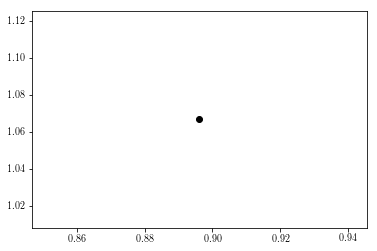

In [32]:
print phi_M31gd, lbar_M31gd
print lbar_M31gd*np.cos(phi_M31gd),lbar_M31gd*np.sin(phi_M31gd)
plt.plot((lbar_M31gd*np.cos(phi_M31gd),lbar_M31gd*np.sin(phi_M31gd), 'ok' )

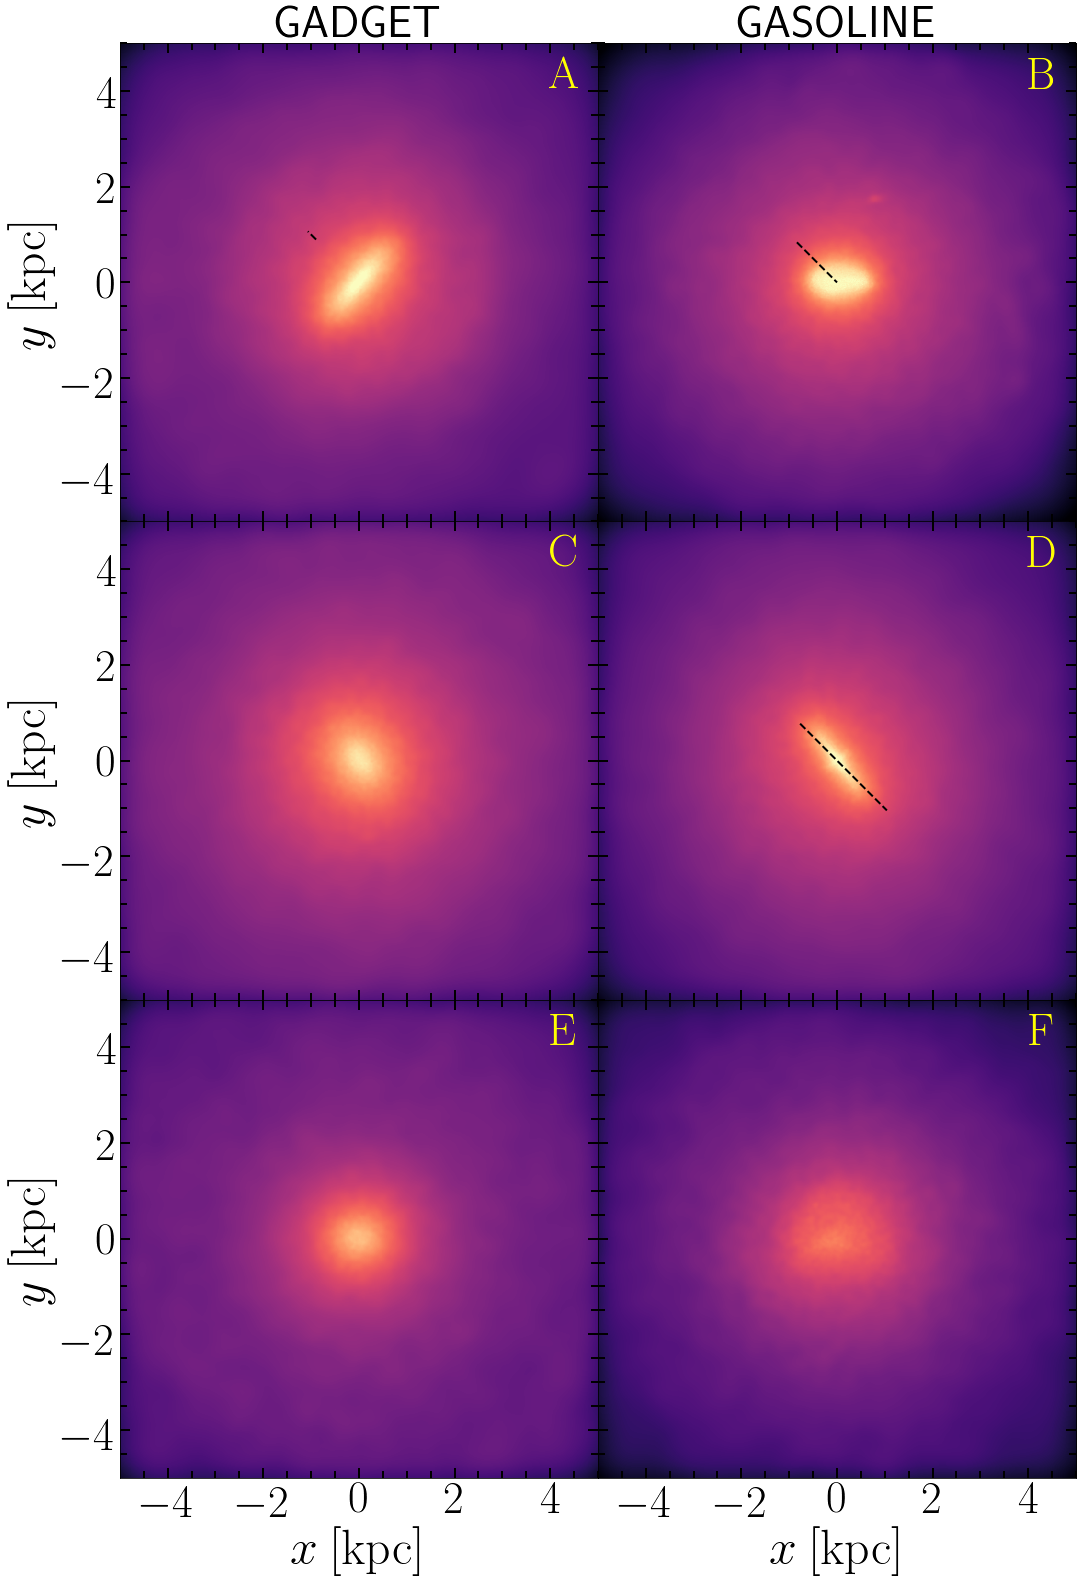

In [24]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,22.9))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[2,5]})
fig.subplots_adjust(bottom=0.08, left =0.12, right = 0.95, top = 0.95, wspace=0., hspace= 0)

particles=sph.Particles(M31_gd[:3,corte1],m_M31gd[corte1]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[0,0].contour(count_M31gd,extent=[xedges_M31gd.min(),xedges_M31gd.max(),yedges_M31gd.min(),yedges_M31gd.max()], colors ='k',
#                 linewidths=2, norm=LogNorm(), levels =[100])
# ax[0,0].add_patch(patches.Circle((0,0),radius=lbar_M31gd,fill=None, ls='--', lw=2))
ax[0,0].plot([-lbar_M31gd*cos(phi_M31gd),-lbar_M31gd*sin(phi_M31gd)],[lbar_M31gd*cos(phi_M31gd),lbar_M31gd*sin(phi_M31gd)], '--k', lw=2)
ax[0,0].set_xlim(-5,5)
ax[0,0].set_ylim(-5,5)
ax[0,0].set_xticks([-4,-2,0,2,4])
ax[0,0].set_yticks([-4,-2,0,2,4])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$y\:\mathrm{[kpc]}$', fontsize=50)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=45)
ax[0,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[0,0].text(4.3, 4.3,'$\mathrm{A}$', fontsize=45, color='yellow', ha='center', va='center') 
ax[0,0].set_title('GADGET', loc='center', fontsize=45)


#----------------------------------------------------------------------------------------------------------
particles=sph.Particles(M31_gs[:3,corte4],m_M31gs[corte4],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend1=sph.Render(escena)
extent=escena.get_extent()
rend1.set_logscale()

# ax[0,0]=fig.add_subplot(221)
ax[0,1].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[0,1].contour(count_M31gs,extent=[xedges_M31gs.min(),xedges_M31gs.max(),yedges_M31gs.min(),yedges_M31gs.max()], colors ='k',
#                 linewidths=2, norm=LogNorm(), levels =[400])
# ax[0,1].add_patch(patches.Circle((0,0),radius=lbar_M31gs,fill=None, ls='--', lw=2))
ax[0,1].plot([-lbar_M31gs*cos(phi_M31gs),-lbar_M31gs*sin(phi_M31gs)],[lbar_M31gs*cos(phi_M31gs),lbar_M31gs*sin(phi_M31gs)], '--k', lw=2)
ax[0,1].set_xlim(-5,5)
ax[0,1].set_ylim(-5,5)
ax[0,1].set_xticks([-4,-2,0,2,4])
ax[0,1].set_yticks([-4,-2,0,2,4])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
# ax[1,1].set_ylabel('$y\:[kpc]$', fontsize=50)
# ax[1,0].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=45)
ax[0,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')

ax[0,1].text(4.3, 4.3,'$\mathrm{B}$', fontsize=45, color='yellow', ha='center', va='center') 
# ax[0,1].text(-4.3, 4.3,'Face-on', fontsize=30, color='yellow', ha='left', va='center') 

# ax[0,1].plot(0,0,'k+', markersize=20, color='k')
ax[0,1].set_title('GASOLINE', loc='center', fontsize=45)




#---------------------------------

particles=sph.Particles(MW_gd[:3,corte2],m_MWgd[corte2]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[1,0].contour(count_MWgd,extent=[xedges_MWgd.min(),xedges_MWgd.max(),yedges_MWgd.min(),yedges_MWgd.max()], colors ='k',
#                linewidths=3, norm=LogNorm(), levels =[300])
ax[1,0].set_xlim(-5,5)
ax[1,0].set_ylim(-5,5)
ax[1,0].set_xticks([-4,-2,0,2,4])
ax[1,0].set_yticks([-4,-2,0,2,4])
ax[1,0].set_xticklabels([])
# ax[1,0].set_yticklabels([])
ax[1,0].set_ylabel('$y\:\mathrm{[kpc]}$', fontsize=50)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=45)
ax[1,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[1,0].plot(0,0,'k+', markersize=20, color='k')
ax[1,0].text(4.3, 4.3,'$\mathrm{C}$', fontsize=45, color='yellow', ha='center', va='center') 



particles=sph.Particles(MW_gs[:3,corte5],m_MWgs[corte5],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[1,1].contour(count_MWgs,extent=[xedges_MWgs.min(),xedges_MWgs.max(),yedges_MWgs.min(),yedges_MWgs.max()], colors ='k',
#                linewidths=2, norm=LogNorm(), levels =[205])
ax[1,1].add_patch(patches.Circle((0,0),radius=lbar_MWgs,fill=None, ls='--', lw=2))
ax[1,1].plot([-lbar_MWgs*cos(phi_MWgs),-lbar_MWgs*sin(phi_MWgs)],[lbar_MWgs*cos(phi_MWgs),lbar_MWgs*sin(phi_MWgs)], '--k', lw=2)
ax[1,1].set_xlim(-5,5)
ax[1,1].set_ylim(-5,5)
ax[1,1].set_xticks([-4,-2,0,2,4])
ax[1,1].set_yticks([-4,-2,0,2,4])
# ax[1,1].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=45)
ax[1,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
ax[1,1].text(4.3, 4.3,'$\mathrm{D}$', fontsize=45, color='yellow', ha='center', va='center') 

# ax[1,1].plot(0,0,'k+', markersize=20, color='k')

#---------------------------------

particles=sph.Particles(M33_gd[:3,corte3],m_M33gd[corte3]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[2,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[2,0].contour(count_M33gd,extent=[xedges_M33gd.min(),xedges_M33gd.max(),yedges_M33gd.min(),yedges_M33gd.max()], colors ='k',
#                 linewidths=3, norm=LogNorm())
ax[2,0].set_xlim(-5,5)
ax[2,0].set_ylim(-5,5)
ax[2,0].set_xticks([-4,-2,0,2,4])
ax[2,0].set_yticks([-4,-2,0,2,4])
# ax[1,0].set_xticklabels([])
# ax[1,0].set_yticklabels([])
ax[2,0].set_ylabel('$y\:\mathrm{[kpc]}$', fontsize=50)
ax[2,0].set_xlabel('$x\:\mathrm{[kpc]}$', fontsize=50)
ax[2,0].minorticks_on()
ax[2,0].tick_params( labelsize=45)
ax[2,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[2,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[2,0].plot(0,0,'k+', markersize=20, color='k')
ax[2,0].text(4.3, 4.3,'$\mathrm{E}$', fontsize=45, color='yellow', ha='center', va='center') 



particles=sph.Particles(M33_gs[:3,corte6],m_M33gs[corte6],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[2,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[2,1].contour(count_M33gs,extent=[xedges_M33gs.min(),xedges_M33gs.max(),yedges_M33gs.min(),yedges_M33gs.max()], colors ='k',
#                linewidths=3, norm=LogNorm())#, levels =[700])
ax[2,1].set_xlim(-5,5)
ax[2,1].set_ylim(-5,5)
ax[2,1].set_xticks([-4,-2,0,2,4])
ax[2,1].set_yticks([-4,-2,0,2,4])
ax[2,1].set_xlabel('$x\:\mathrm{[kpc]}$', fontsize=50)
# ax[1,1].set_xticklabels([])
ax[2,1].set_yticklabels([])
ax[2,1].minorticks_on()
ax[2,1].tick_params( labelsize=45)
ax[2,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[2,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
ax[2,1].text(4.3, 4.3,'$\mathrm{F}$', fontsize=45, color='yellow', ha='center', va='center') 

# ax[2,1].plot(0,0,'k+', markersize=20, color='k')


#---------------------------------


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Barras2.pdf', dpi = 100, xxbox_inches='tight')
plt.show()


## edge-on

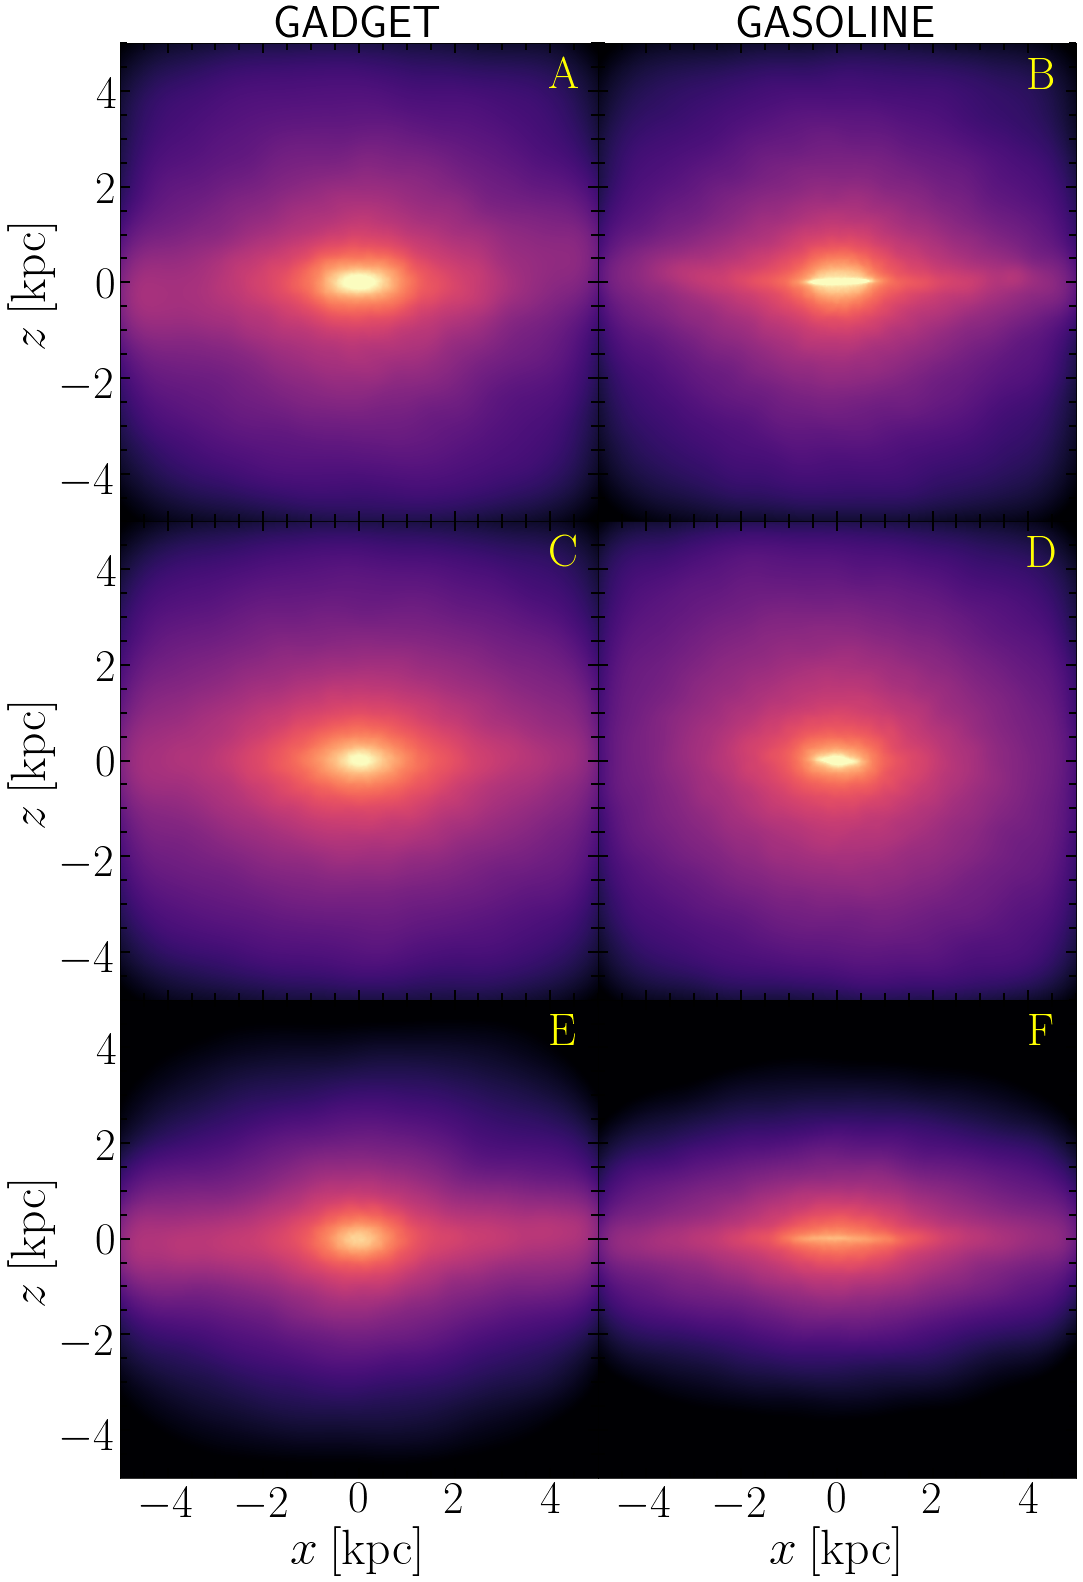

In [7]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,22.9))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[2,5]})
fig.subplots_adjust(bottom=0.08, left =0.12, right = 0.95, top = 0.95, wspace=0., hspace= 0)

particles=sph.Particles(M31_gd[:3,corte1],m_M31gd[corte1]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[0,0].contour(count_M31gd,extent=[xedges_M31gd.min(),xedges_M31gd.max(),yedges_M31gd.min(),yedges_M31gd.max()], colors ='k',
#                 linewidths=4, norm=LogNorm(), levels =[100])
# ax[0,0].add_patch(patches.Circle((0,0),radius=lbar_M31gd,fill=None))
ax[0,0].set_xlim(-5,5)
ax[0,0].set_ylim(-5,5)
ax[0,0].set_xticks([-4,-2,0,2,4])
ax[0,0].set_yticks([-4,-2,0,2,4])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$z\:\mathrm{[kpc]}$', fontsize=50)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=45)
ax[0,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[0,0].text(4.3, 4.3,'$\mathrm{A}$', fontsize=45, color='yellow', ha='center', va='center') 
ax[0,0].set_title('GADGET', loc='center', fontsize=45)


#----------------------------------------------------------------------------------------------------------
particles=sph.Particles(M31_gs[:3,corte4],m_M31gs[corte4],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend1=sph.Render(escena)
extent=escena.get_extent()
rend1.set_logscale()

# ax[0,0]=fig.add_subplot(221)
ax[0,1].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[0,1].contour(count_M31gs,extent=[xedges_M31gs.min(),xedges_M31gs.max(),yedges_M31gs.min(),yedges_M31gs.max()], colors ='k',
#                 linewidths=4, norm=LogNorm(), levels =[400])
# ax[0,1].add_patch(patches.Circle((0,0),radius=lbar_M31gs,fill=None))
ax[0,1].set_xlim(-5,5)
ax[0,1].set_ylim(-5,5)
ax[0,1].set_xticks([-4,-2,0,2,4])
ax[0,1].set_yticks([-4,-2,0,2,4])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
# ax[1,1].set_ylabel('$y\:[kpc]$', fontsize=50)
# ax[1,0].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=45)
ax[0,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')

ax[0,1].text(4.3, 4.3,'$\mathrm{B}$', fontsize=45, color='yellow', ha='center', va='center') 
# ax[0,1].text(-4.3, 4.3,'Face-on', fontsize=30, color='yellow', ha='left', va='center') 

# ax[0,1].plot(0,0,'k+', markersize=20, color='k')
ax[0,1].set_title('GASOLINE', loc='center', fontsize=45)




#---------------------------------

particles=sph.Particles(MW_gd[:3,corte2],m_MWgd[corte2]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[1,0].contour(count_MWgd,extent=[xedges_MWgd.min(),xedges_MWgd.max(),yedges_MWgd.min(),yedges_MWgd.max()], colors ='k',
#                linewidths=3, norm=LogNorm(), levels =[300])
ax[1,0].set_xlim(-5,5)
ax[1,0].set_ylim(-5,5)
ax[1,0].set_xticks([-4,-2,0,2,4])
ax[1,0].set_yticks([-4,-2,0,2,4])
ax[1,0].set_xticklabels([])
# ax[1,0].set_yticklabels([])
ax[1,0].set_ylabel('$z\:\mathrm{[kpc]}$', fontsize=50)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=45)
ax[1,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[1,0].plot(0,0,'k+', markersize=20, color='k')
ax[1,0].text(4.3, 4.3,'$\mathrm{C}$', fontsize=45, color='yellow', ha='center', va='center') 



particles=sph.Particles(MW_gs[:3,corte5],m_MWgs[corte5],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[1,1].contour(count_MWgs,extent=[xedges_MWgs.min(),xedges_MWgs.max(),yedges_MWgs.min(),yedges_MWgs.max()], colors ='k',
#                linewidths=4, norm=LogNorm(), levels =[205])
# ax[1,1].add_patch(patches.Circle((0,0),radius=lbar_MWgs,fill=None))
ax[1,1].set_xlim(-5,5)
ax[1,1].set_ylim(-5,5)
ax[1,1].set_xticks([-4,-2,0,2,4])
ax[1,1].set_yticks([-4,-2,0,2,4])
# ax[1,1].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=45)
ax[1,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
ax[1,1].text(4.3, 4.3,'$\mathrm{D}$', fontsize=45, color='yellow', ha='center', va='center') 

# ax[1,1].plot(0,0,'k+', markersize=20, color='k')

#---------------------------------

particles=sph.Particles(M33_gd[:3,corte3],m_M33gd[corte3]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[2,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[2,0].contour(count_M33gd,extent=[xedges_M33gd.min(),xedges_M33gd.max(),yedges_M33gd.min(),yedges_M33gd.max()], colors ='k',
#                 linewidths=3, norm=LogNorm())
ax[2,0].set_xlim(-5,5)
ax[2,0].set_ylim(-5,5)
ax[2,0].set_xticks([-4,-2,0,2,4])
ax[2,0].set_yticks([-4,-2,0,2,4])
# ax[1,0].set_xticklabels([])
# ax[1,0].set_yticklabels([])
ax[2,0].set_ylabel('$z\:\mathrm{[kpc]}$', fontsize=50)
ax[2,0].set_xlabel('$x\:\mathrm{[kpc]}$', fontsize=50)
ax[2,0].minorticks_on()
ax[2,0].tick_params( labelsize=45)
ax[2,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[2,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[2,0].plot(0,0,'k+', markersize=20, color='k')
ax[2,0].text(4.3, 4.3,'$\mathrm{E}$', fontsize=45, color='yellow', ha='center', va='center') 



particles=sph.Particles(M33_gs[:3,corte6],m_M33gs[corte6],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[2,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[2,1].contour(count_M33gs,extent=[xedges_M33gs.min(),xedges_M33gs.max(),yedges_M33gs.min(),yedges_M33gs.max()], colors ='k',
#                linewidths=3, norm=LogNorm())#, levels =[700])
ax[2,1].set_xlim(-5,5)
ax[2,1].set_ylim(-5,5)
ax[2,1].set_xticks([-4,-2,0,2,4])
ax[2,1].set_yticks([-4,-2,0,2,4])
ax[2,1].set_xlabel('$x\:\mathrm{[kpc]}$', fontsize=50)
# ax[1,1].set_xticklabels([])
ax[2,1].set_yticklabels([])
ax[2,1].minorticks_on()
ax[2,1].tick_params( labelsize=45)
ax[2,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[2,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
ax[2,1].text(4.3, 4.3,'$\mathrm{F}$', fontsize=45, color='yellow', ha='center', va='center') 

# ax[2,1].plot(0,0,'k+', markersize=20, color='k')


#---------------------------------


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Barras_edgeon.pdf', dpi = 100, xxbox_inches='tight')
plt.show()


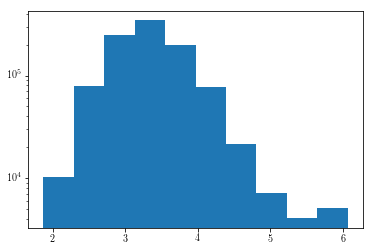

In [14]:
rend1.histogram(log=True)

In [8]:
#---------------------generador del gráfico-----------------
rl=25   
corte1,=np.where((x_M31gd <rl) & (y_M31gd <rl) & (z_M31gd <rl) & (x_M31gd >-rl) & (y_M31gd >-rl) & (z_M31gd >-rl))
corte2,=np.where((x_MWgd <rl) & (y_MWgd <rl) & (z_MWgd <rl) & (x_MWgd >-rl) & (y_MWgd >-rl) & (z_MWgd >-rl))
corte3,=np.where((x_M33gd <rl) & (y_M33gd <rl) & (z_M33gd <rl) & (x_M33gd >-rl) & (y_M33gd >-rl) & (z_M33gd >-rl))

corte4,=np.where((x_M31gs <rl) & (y_M31gs <rl) & (z_M31gs <rl) & (x_M31gs >-rl) & (y_M31gs >-rl) & (z_M31gs >-rl))
corte5,=np.where((x_MWgs <rl) & (y_MWgs <rl) & (z_MWgs <rl) & (x_MWgs >-rl) & (y_MWgs >-rl) & (z_MWgs >-rl))
corte6,=np.where((x_M33gs <rl) & (y_M33gs <rl) & (z_M33gs <rl) & (x_M33gs >-rl) & (y_M33gs >-rl) & (z_M33gs >-rl))

#-----rango que tiene la escala  de colores-----
vmin=1
vmax=6.8

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='magma'

nb1 = 150

npixel = 1000

In [98]:
bins = 100

counts_M31gd, xedges_M31gd, yedges_M31gd = histogram2d(x_M31gd[corte1],y_M31gd[corte1],bins)
counts_MWgd,  xedges_MWgd,  yedges_MWgd  = histogram2d(x_MWgd[corte2],y_MWgd[corte2],bins)
counts_M33gd, xedges_M33gd, yedges_M33gd = histogram2d(x_M33gd[corte3],y_M33gd[corte3],bins)

counts_M31gs, xedges_M31gs, yedges_M31gs = histogram2d(x_M31gs[corte4],y_M31gs[corte4],bins)
counts_MWgs,  xedges_MWgs,  yedges_MWgs  = histogram2d(x_MWgs[corte5],y_MWgs[corte5],bins)
counts_M33gs, xedges_M33gs, yedges_M33gs = histogram2d(x_M33gs[corte6],y_M33gs[corte6],bins)

edges1 = [20,50,150,500,3000]

count_M31gd = np.transpose(counts_M31gd)
count_MWgd  = np.transpose(counts_MWgd)
count_M33gd = np.transpose(counts_M33gd)

count_M31gs = np.transpose(counts_M31gs)
count_MWgs  = np.transpose(counts_MWgs)
count_M33gs = np.transpose(counts_M33gs)

## face-on

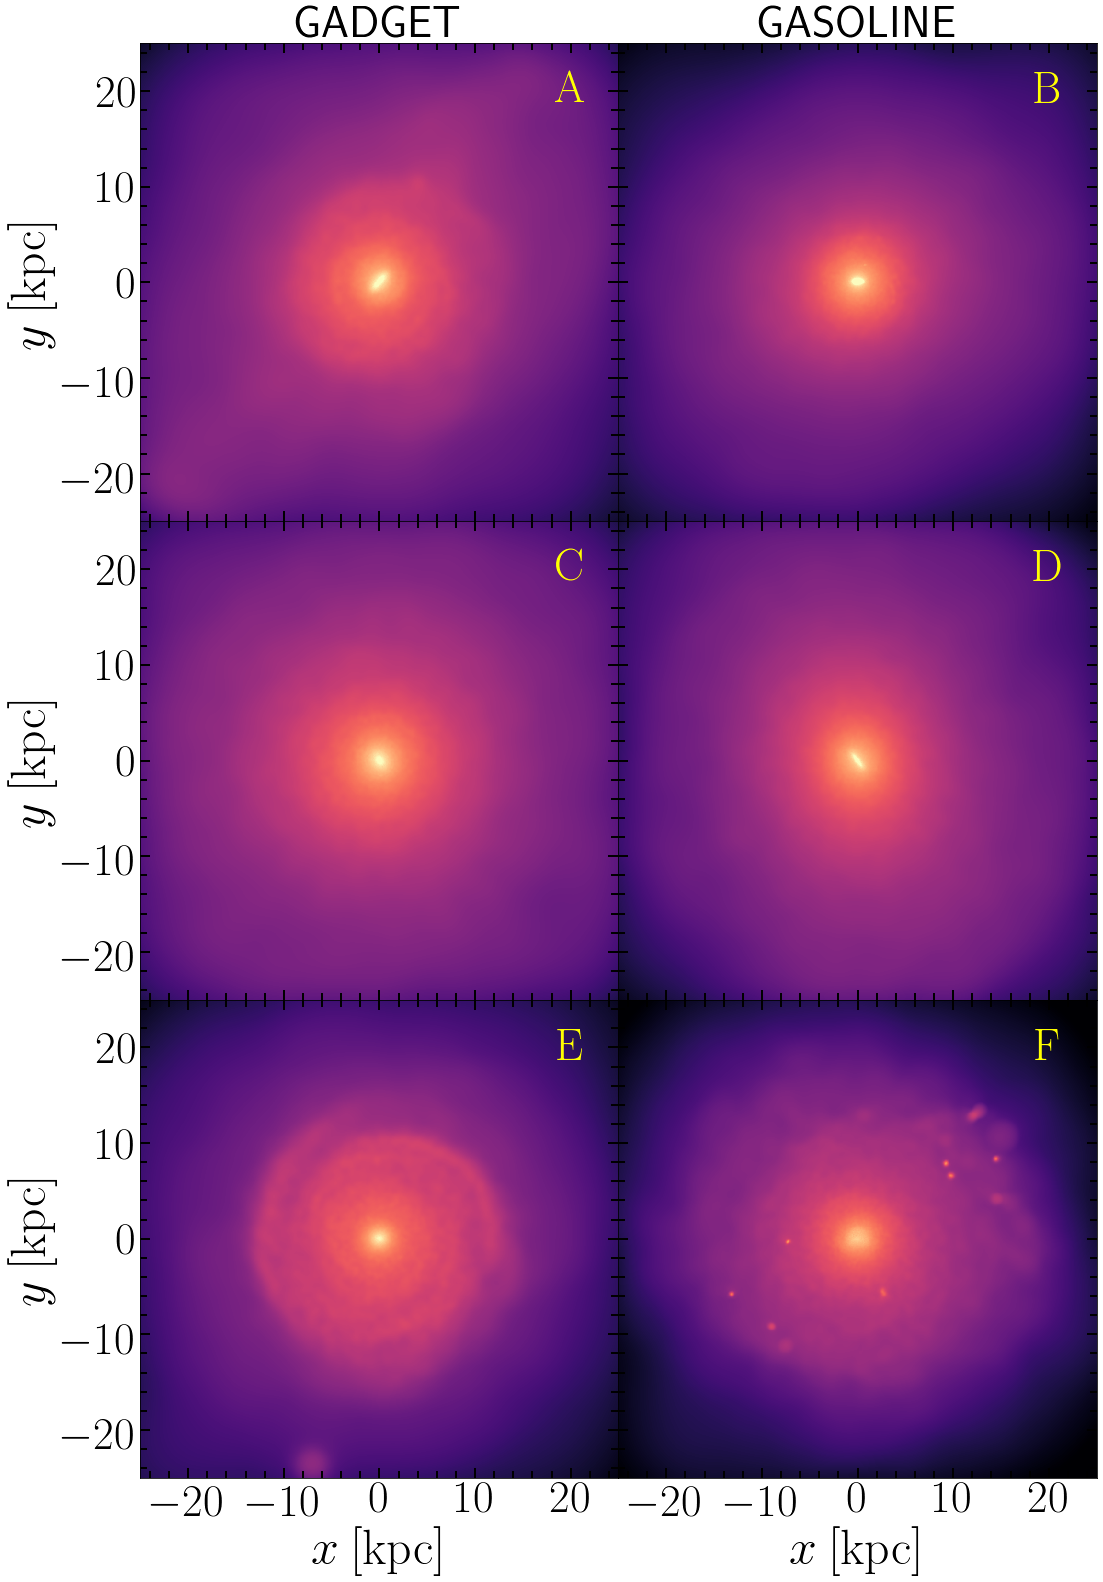

In [99]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,22.9))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[2,5]})
fig.subplots_adjust(bottom=0.08, left =0.12, right = 0.95, top = 0.95, wspace=0., hspace= 0)

particles=sph.Particles(M31_gd[:3,corte1],m_M31gd[corte1]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[0,0].contour(count_M31gd,extent=[xedges_M31gd.min(),xedges_M31gd.max(),yedges_M31gd.min(),yedges_M31gd.max()], colors ='k',
#                 linewidths=3, norm=LogNorm())#, levels =[150])
# ax[0,0].add_patch(patches.Circle((0,0),radius=lbar_M31gd,fill=None,lw=3))
ax[0,0].set_xlim(-25,25)
ax[0,0].set_ylim(-25,25)
ax[0,0].set_xticks([-20,-10,0,10,20])
ax[0,0].set_yticks([-20,-10,0,10,20])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$y\:\mathrm{[kpc]}$', fontsize=50)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=45)
ax[0,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[0,0].text(20, 20,'$\mathrm{A}$', fontsize=45, color='yellow', ha='center', va='center') 
ax[0,0].set_title('GADGET', loc='center', fontsize=45)


#----------------------------------------------------------------------------------------------------------
particles=sph.Particles(M31_gs[:3,corte4],m_M31gs[corte4],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend1=sph.Render(escena)
extent=escena.get_extent()
rend1.set_logscale()

# ax[0,0]=fig.add_subplot(221)
ax[0,1].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)

ax[0,1].set_xlim(-25,25)
ax[0,1].set_ylim(-25,25)
ax[0,1].set_xticks([-20,-10,0,10,20])
ax[0,1].set_yticks([-20,-10,0,10,20])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
# ax[1,1].set_ylabel('$y\:[kpc]$', fontsize=50)
# ax[1,0].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=45)
ax[0,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')

ax[0,1].text(20, 20,'$\mathrm{B}$', fontsize=45, color='yellow', ha='center', va='center') 
# ax[0,1].text(-4.3, 4.3,'Face-on', fontsize=30, color='yellow', ha='left', va='center') 

# ax[0,1].plot(0,0,'k+', markersize=20, color='k')
ax[0,1].set_title('GASOLINE', loc='center', fontsize=45)




#---------------------------------

particles=sph.Particles(MW_gd[:3,corte2],m_MWgd[corte2]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].set_xlim(-25,25)
ax[1,0].set_ylim(-25,25)
ax[1,0].set_xticks([-20,-10,0,10,20])
ax[1,0].set_yticks([-20,-10,0,10,20])
ax[1,0].set_xticklabels([])
# ax[1,0].set_yticklabels([])
ax[1,0].set_ylabel('$y\:\mathrm{[kpc]}$', fontsize=50)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=45)
ax[1,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[1,0].plot(0,0,'k+', markersize=20, color='k')
ax[1,0].text(20, 20,'$\mathrm{C}$', fontsize=45, color='yellow', ha='center', va='center') 



particles=sph.Particles(MW_gs[:3,corte5],m_MWgs[corte5],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[1,1].contour(count_M31gs,extent=[xedges_M31gs.min(),xedges_M31gs.max(),yedges_M31gs.min(),yedges_M31gs.max()], colors ='k',
#                linewidths=3, norm=LogNorm(), levels =[700])
ax[1,1].set_xlim(-25,25)
ax[1,1].set_ylim(-25,25)
ax[1,1].set_xticks([-20,-10,0,10,20])
ax[1,1].set_yticks([-20,-10,0,10,20])
# ax[1,1].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=45)
ax[1,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
ax[1,1].text(20, 20,'$\mathrm{D}$', fontsize=45, color='yellow', ha='center', va='center') 

# ax[1,1].plot(0,0,'k+', markersize=20, color='k')

#---------------------------------

particles=sph.Particles(M33_gd[:3,corte3],m_M33gd[corte3]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[2,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,0].set_xlim(-25,25)
ax[2,0].set_ylim(-25,25)
ax[2,0].set_xticks([-20,-10,0,10,20])
ax[2,0].set_yticks([-20,-10,0,10,20])
# ax[1,0].set_xticklabels([])
# ax[1,0].set_yticklabels([])
ax[2,0].set_ylabel('$y\:\mathrm{[kpc]}$', fontsize=50)
ax[2,0].set_xlabel('$x\:\mathrm{[kpc]}$', fontsize=50)
ax[2,0].minorticks_on()
ax[2,0].tick_params( labelsize=45)
ax[2,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[2,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[2,0].plot(0,0,'k+', markersize=20, color='k')
ax[2,0].text(20, 20,'$\mathrm{E}$', fontsize=45, color='yellow', ha='center', va='center') 



particles=sph.Particles(M33_gs[:3,corte6],m_M33gs[corte6],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[2,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[1,1].contour(count_M31gs,extent=[xedges_M31gs.min(),xedges_M31gs.max(),yedges_M31gs.min(),yedges_M31gs.max()], colors ='k',
#                linewidths=3, norm=LogNorm(), levels =[700])
ax[2,1].set_xlim(-25,25)
ax[2,1].set_ylim(-25,25)
ax[2,1].set_xticks([-20,-10,0,10,20])
ax[2,1].set_yticks([-20,-10,0,10,20])
ax[2,1].set_xlabel('$x\:\mathrm{[kpc]}$', fontsize=50)
# ax[1,1].set_xticklabels([])
ax[2,1].set_yticklabels([])
ax[2,1].minorticks_on()
ax[2,1].tick_params( labelsize=45)
ax[2,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[2,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
ax[2,1].text(20, 20,'$\mathrm{F}$', fontsize=45, color='yellow', ha='center', va='center') 

# ax[2,1].plot(0,0,'k+', markersize=20, color='k')


#---------------------------------


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/galaxias.pdf', dpi = 100, xxbox_inches='tight')
plt.show()


## edge-on

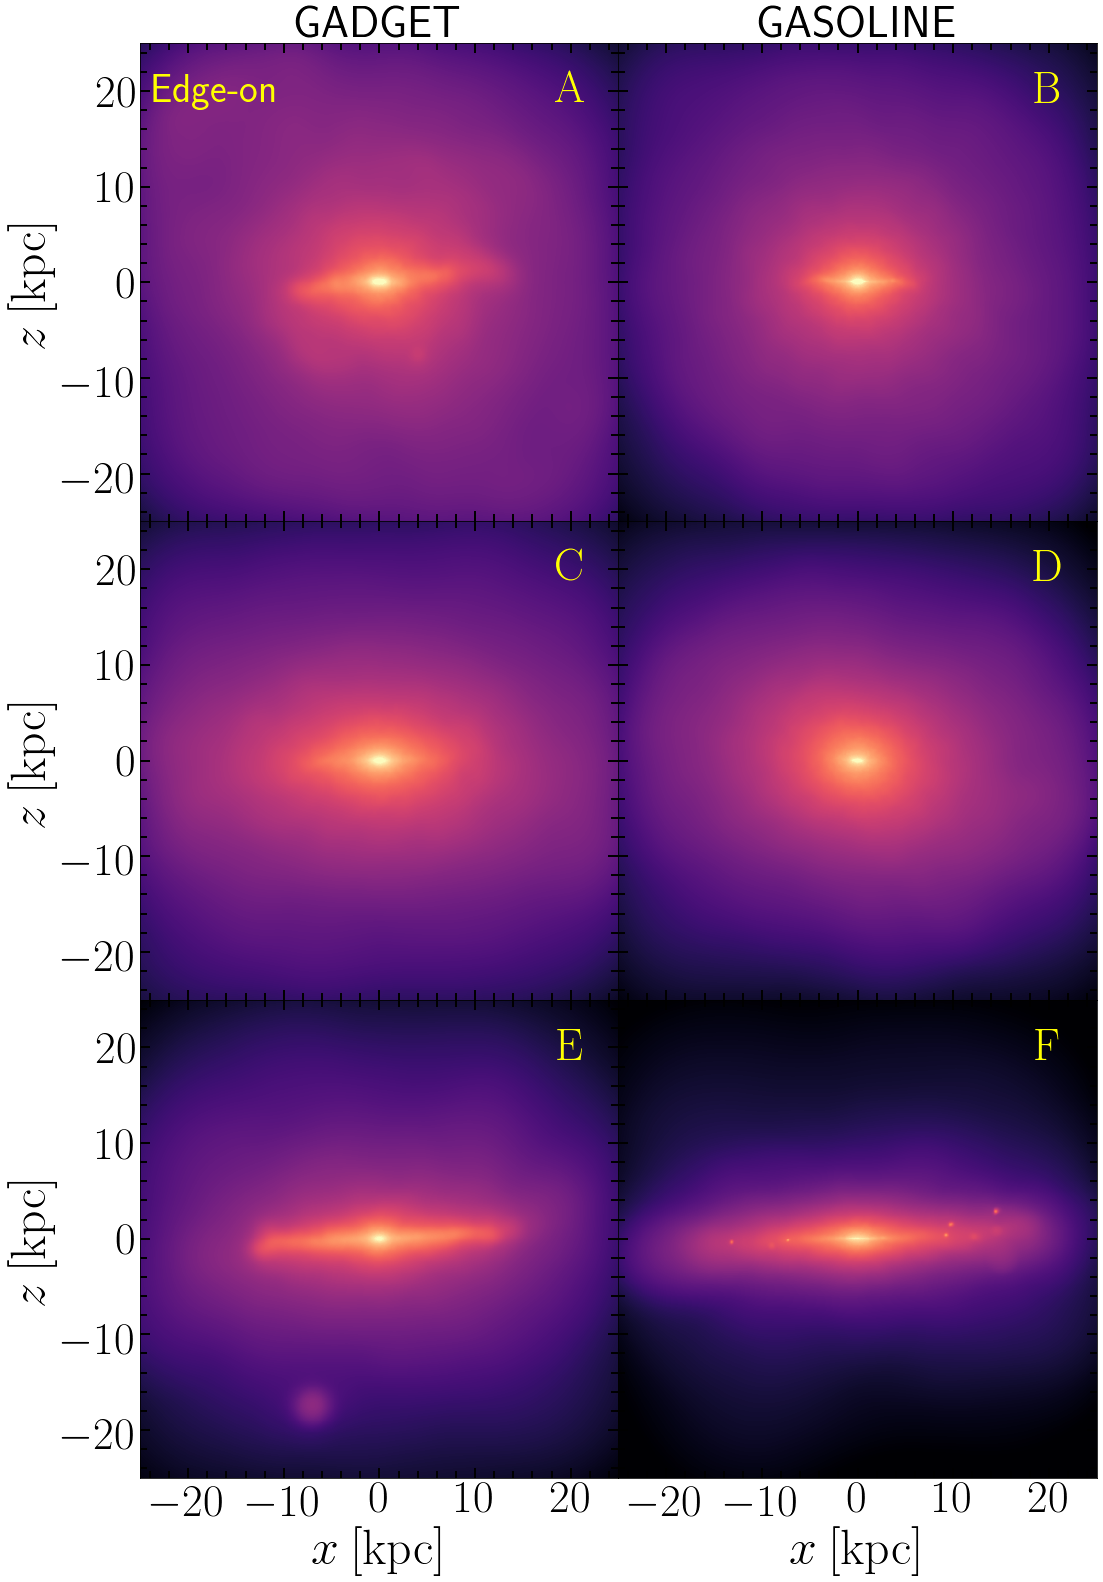

In [12]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,22.9))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[2,5]})
fig.subplots_adjust(bottom=0.08, left =0.12, right = 0.95, top = 0.95, wspace=0., hspace= 0)

particles=sph.Particles(M31_gd[:3,corte1],m_M31gd[corte1]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[0,0].contour(count_M31gd,extent=[xedges_M31gd.min(),xedges_M31gd.max(),yedges_M31gd.min(),yedges_M31gd.max()], colors ='k',
#                 linewidths=3, norm=LogNorm())#, levels =[150])
# ax[0,0].add_patch(patches.Circle((0,0),radius=lbar_M31gd,fill=None,lw=3))
ax[0,0].set_xlim(-25,25)
ax[0,0].set_ylim(-25,25)
ax[0,0].set_xticks([-20,-10,0,10,20])
ax[0,0].set_yticks([-20,-10,0,10,20])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$z\:\mathrm{[kpc]}$', fontsize=50)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=45)
ax[0,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[0,0].text(20, 20,'$\mathrm{A}$', fontsize=45, color='yellow', ha='center', va='center')
ax[0,0].text(-17, 20,'Edge-on', fontsize=40, color='yellow', ha='center', va='center') 
ax[0,0].set_title('GADGET', loc='center', fontsize=45)


#----------------------------------------------------------------------------------------------------------
particles=sph.Particles(M31_gs[:3,corte4],m_M31gs[corte4],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend1=sph.Render(escena)
extent=escena.get_extent()
rend1.set_logscale()

# ax[0,0]=fig.add_subplot(221)
ax[0,1].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)

ax[0,1].set_xlim(-25,25)
ax[0,1].set_ylim(-25,25)
ax[0,1].set_xticks([-20,-10,0,10,20])
ax[0,1].set_yticks([-20,-10,0,10,20])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
# ax[1,1].set_ylabel('$y\:[kpc]$', fontsize=50)
# ax[1,0].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=45)
ax[0,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')

ax[0,1].text(20, 20,'$\mathrm{B}$', fontsize=45, color='yellow', ha='center', va='center') 
# ax[0,1].text(-4.3, 4.3,'Face-on', fontsize=30, color='yellow', ha='left', va='center') 

# ax[0,1].plot(0,0,'k+', markersize=20, color='k')
ax[0,1].set_title('GASOLINE', loc='center', fontsize=45)




#---------------------------------

particles=sph.Particles(MW_gd[:3,corte2],m_MWgd[corte2]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].set_xlim(-25,25)
ax[1,0].set_ylim(-25,25)
ax[1,0].set_xticks([-20,-10,0,10,20])
ax[1,0].set_yticks([-20,-10,0,10,20])
ax[1,0].set_xticklabels([])
# ax[1,0].set_yticklabels([])
ax[1,0].set_ylabel('$z\:\mathrm{[kpc]}$', fontsize=50)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=45)
ax[1,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[1,0].plot(0,0,'k+', markersize=20, color='k')
ax[1,0].text(20, 20,'$\mathrm{C}$', fontsize=45, color='yellow', ha='center', va='center') 



particles=sph.Particles(MW_gs[:3,corte5],m_MWgs[corte5],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[1,1].contour(count_M31gs,extent=[xedges_M31gs.min(),xedges_M31gs.max(),yedges_M31gs.min(),yedges_M31gs.max()], colors ='k',
#                linewidths=3, norm=LogNorm(), levels =[700])
ax[1,1].set_xlim(-25,25)
ax[1,1].set_ylim(-25,25)
ax[1,1].set_xticks([-20,-10,0,10,20])
ax[1,1].set_yticks([-20,-10,0,10,20])
# ax[1,1].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=45)
ax[1,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
ax[1,1].text(20, 20,'$\mathrm{D}$', fontsize=45, color='yellow', ha='center', va='center') 

# ax[1,1].plot(0,0,'k+', markersize=20, color='k')

#---------------------------------

particles=sph.Particles(M33_gd[:3,corte3],m_M33gd[corte3]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[2,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,0].set_xlim(-25,25)
ax[2,0].set_ylim(-25,25)
ax[2,0].set_xticks([-20,-10,0,10,20])
ax[2,0].set_yticks([-20,-10,0,10,20])
# ax[1,0].set_xticklabels([])
# ax[1,0].set_yticklabels([])
ax[2,0].set_ylabel('$z\:\mathrm{[kpc]}$', fontsize=50)
ax[2,0].set_xlabel('$x\:\mathrm{[kpc]}$', fontsize=50)
ax[2,0].minorticks_on()
ax[2,0].tick_params( labelsize=45)
ax[2,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[2,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
# ax[2,0].plot(0,0,'k+', markersize=20, color='k')
ax[2,0].text(20, 20,'$\mathrm{E}$', fontsize=45, color='yellow', ha='center', va='center') 



particles=sph.Particles(M33_gs[:3,corte6],m_M33gs[corte6],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel, t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[2,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
# ax[1,1].contour(count_M31gs,extent=[xedges_M31gs.min(),xedges_M31gs.max(),yedges_M31gs.min(),yedges_M31gs.max()], colors ='k',
#                linewidths=3, norm=LogNorm(), levels =[700])
ax[2,1].set_xlim(-25,25)
ax[2,1].set_ylim(-25,25)
ax[2,1].set_xticks([-20,-10,0,10,20])
ax[2,1].set_yticks([-20,-10,0,10,20])
ax[2,1].set_xlabel('$x\:\mathrm{[kpc]}$', fontsize=50)
# ax[1,1].set_xticklabels([])
ax[2,1].set_yticklabels([])
ax[2,1].minorticks_on()
ax[2,1].tick_params( labelsize=45)
ax[2,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[2,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
ax[2,1].text(20, 20,'$\mathrm{F}$', fontsize=45, color='yellow', ha='center', va='center') 

# ax[2,1].plot(0,0,'k+', markersize=20, color='k')


#---------------------------------


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/galaxias_edgeon.pdf', dpi = 100, xxbox_inches='tight')
plt.show()


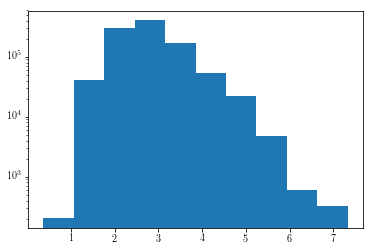

In [15]:
rend1.histogram(log=True)

## Calculamos los semiejes del elipsoide - M31gd

In [11]:
import tenform as ten
from numpy import linalg

data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_lbarvstime.dat')
lbar1_M31gd = data[:,1]
lbar2_M31gd = data[:,2]

r_M31gd = np.sqrt(x_M31gd**2 + y_M31gd**2 + z_M31gd**2)
    
#----para lbar1--------------------------------------------------------------
limit1,=np.where(r_M31gd < lbar1_M31gd[0])
tensor = ten.tenf(x_M31gd[limit1], y_M31gd[limit1], z_M31gd[limit1])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a1 = asort[2]
b1 = asort[1]
c1 = asort[0]

A1_M31gd = np.sqrt(a1)
B1_M31gd = np.sqrt(b1)
C1_M31gd = np.sqrt(c1)

#----para lbar2--------------------------------------------------------------
limit2,=np.where(r_M31gd < lbar2_M31gd[0])
tensor = ten.tenf(x_M31gd[limit2], y_M31gd[limit2], z_M31gd[limit2])

matriz = linalg.eig(tensor)
autov  = matriz[0]

autovector = matriz[1]

asort  = np.sort(autov)

a2 = asort[2]
b2 = asort[1]
c2 = asort[0]

A2_M31gd = np.sqrt(a2)
B2_M31gd = np.sqrt(b2)
C2_M31gd = np.sqrt(c2)

# print 'A2=', A2, 'B2=', B2, 'C2=', C2
# print B2/A2, C2/A2, C2/B2


## Calculamos los semiejes del elipsoide - MWgd

In [ ]:
data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/MW_lbarvstime.dat')
lbar1_MWgd = data[:,1]
lbar2_MWgd = data[:,2]

r_MWgd  = np.sqrt(x_MWgd**2  + y_MWgd**2  + z_MWgd**2)

#----para lbar1--------------------------------------------------------------
limit1,=np.where(r_MWgd < lbar1_MWgd[0])
tensor = ten.tenf(x_MWgd[limit1], y_MWgd[limit1], z_MWgd[limit1])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a1 = asort[2]
b1 = asort[1]
c1 = asort[0]

A1_MWgd = np.sqrt(a1)
B1_MWgd = np.sqrt(b1)
C1_MWgd = np.sqrt(c1)

#----para lbar2--------------------------------------------------------------
limit2,=np.where(r_MWgd < lbar2_MWgd[0])
tensor = ten.tenf(x_MWgd[limit2], y_MWgd[limit2], z_MWgd[limit2])

matriz = linalg.eig(tensor)
autov  = matriz[0]

autovector = matriz[1]

asort  = np.sort(autov)

a2 = asort[2]
b2 = asort[1]
c2 = asort[0]

A2_MWgd = np.sqrt(a2)
B2_MWgd = np.sqrt(b2)
C2_MWgd = np.sqrt(c2)



## Calculamos los semiejes del elipsoide - M31gs

In [13]:
data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/M31_lbarvstime.dat')
lbar1_M31gs = data[:,1]
lbar2_M31gs = data[:,2]

r_M31gs = np.sqrt(x_M31gs**2 + y_M31gs**2 + z_M31gs**2)

#----para lbar1--------------------------------------------------------------
limit1,=np.where(r_M31gs < lbar1_M31gs[0])
tensor = ten.tenf(x_M31gs[limit1], y_M31gs[limit1], z_M31gs[limit1])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a1 = asort[2]
b1 = asort[1]
c1 = asort[0]

A1_M31gs = np.sqrt(a1)
B1_M31gs = np.sqrt(b1)
C1_M31gs = np.sqrt(c1)

#----para lbar2--------------------------------------------------------------
limit2,=np.where(r_M31gs < lbar2_M31gs[0])
tensor = ten.tenf(x_M31gs[limit2], y_M31gs[limit2], z_M31gs[limit2])

matriz = linalg.eig(tensor)
autov  = matriz[0]

autovector = matriz[1]

asort  = np.sort(autov)

a2 = asort[2]
b2 = asort[1]
c2 = asort[0]

A2_M31gs = np.sqrt(a2)
B2_M31gs = np.sqrt(b2)
C2_M31gs = np.sqrt(c2)

# print 'A2=', A2, 'B2=', B2, 'C2=', C2
# print B2/A2, C2/A2, C2/B2


## Calculamos los semiejes del elipsoide - MWgs

In [15]:
data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/MW_lbarvstime.dat')
lbar1_MWgs = data[:,1]
lbar2_MWgs = data[:,2]

r_MWgs  = np.sqrt(x_MWgs**2  + y_MWgs**2  + z_MWgs**2)

#----para lbar1--------------------------------------------------------------
limit1,=np.where(r_MWgs < lbar1_MWgd[0])
tensor = ten.tenf(x_MWgs[limit1], y_MWgs[limit1], z_MWgs[limit1])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a1 = asort[2]
b1 = asort[1]
c1 = asort[0]

A1_MWgs = np.sqrt(a1)
B1_MWgs = np.sqrt(b1)
C1_MWgs = np.sqrt(c1)

#----para lbar2--------------------------------------------------------------
limit2,=np.where(r_MWgs < lbar2_MWgs[0])
tensor = ten.tenf(x_MWgs[limit2], y_MWgs[limit2], z_MWgs[limit2])

matriz = linalg.eig(tensor)
autov  = matriz[0]

autovector = matriz[1]

asort  = np.sort(autov)

a2 = asort[2]
b2 = asort[1]
c2 = asort[0]

A2_MWgs = np.sqrt(a2)
B2_MWgs = np.sqrt(b2)
C2_MWgs = np.sqrt(c2)



# Isocontornos

In [16]:
import sphviewer as sph
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

#path = 'home/ornela/PYTHON/'
path = '/home/omarioni/'


M31_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_pos-mass3.dat')
x_M31gd = M31_gd[0,:]
y_M31gd = M31_gd[1,:]
z_M31gd = M31_gd[2,:]
m_M31gd = M31_gd[3,:]

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_pos-mass3.dat')
x_MWgd = MW_gd[0,:]
y_MWgd = MW_gd[1,:]
z_MWgd = MW_gd[2,:]
m_MWgd = MW_gd[3,:]

M31_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_pos-mass3.dat')
x_M31gs = M31_gs[0,:]
y_M31gs = M31_gs[1,:]
z_M31gs = M31_gs[2,:]
m_M31gs = M31_gs[3,:]

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_pos-mass3.dat')
x_MWgs = MW_gs[0,:]
y_MWgs = MW_gs[1,:]
z_MWgs = MW_gs[2,:]
m_MWgs = MW_gs[3,:]


In [19]:
#---------------------generador del gráfico-----------------
rl=6   
corte1,=np.where((x_M31gd <rl) & (y_M31gd <rl) & (z_M31gd <rl) & (x_M31gd >-rl) & (y_M31gd >-rl) & (z_M31gd >-rl))
corte2,=np.where((x_MWgd <rl) & (y_MWgd <rl) & (z_MWgd <rl) & (x_MWgd >-rl) & (y_MWgd >-rl) & (z_MWgd >-rl))
corte3,=np.where((x_M31gs <rl) & (y_M31gs <rl) & (z_M31gs <rl) & (x_M31gs >-rl) & (y_M31gs >-rl) & (z_M31gs >-rl))
corte4,=np.where((x_MWgs <rl) & (y_MWgs <rl) & (z_MWgs <rl) & (x_MWgs >-rl) & (y_MWgs >-rl) & (z_MWgs >-rl))

#-----rango que tiene la escala  de colores-----
vmin=3
vmax=7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='jet'

nb1 = 500

In [104]:
bins = 100

counts_M31gd, xedges_M31gd, yedges_M31gd = histogram2d(x_M31gd[corte1],y_M31gd[corte1],bins)
counts_MWgd,  xedges_MWgd, yedges_MWgd   = histogram2d(x_MWgd[corte2],y_MWgd[corte2],bins)
counts_M31gs, xedges_M31gs, yedges_M31gs = histogram2d(x_M31gs[corte3],y_M31gs[corte3],bins)
counts_MWgs,  xedges_MWgs, yedges_MWgs   = histogram2d(x_MWgs[corte4],y_MWgs[corte4],bins)

edges1 = [20,50,150,500,3000]

count_M31gd = np.transpose(counts_M31gd)
count_MWgd  = np.transpose(counts_MWgd)
count_M31gs = np.transpose(counts_M31gs)
count_MWgs  = np.transpose(counts_MWgs)

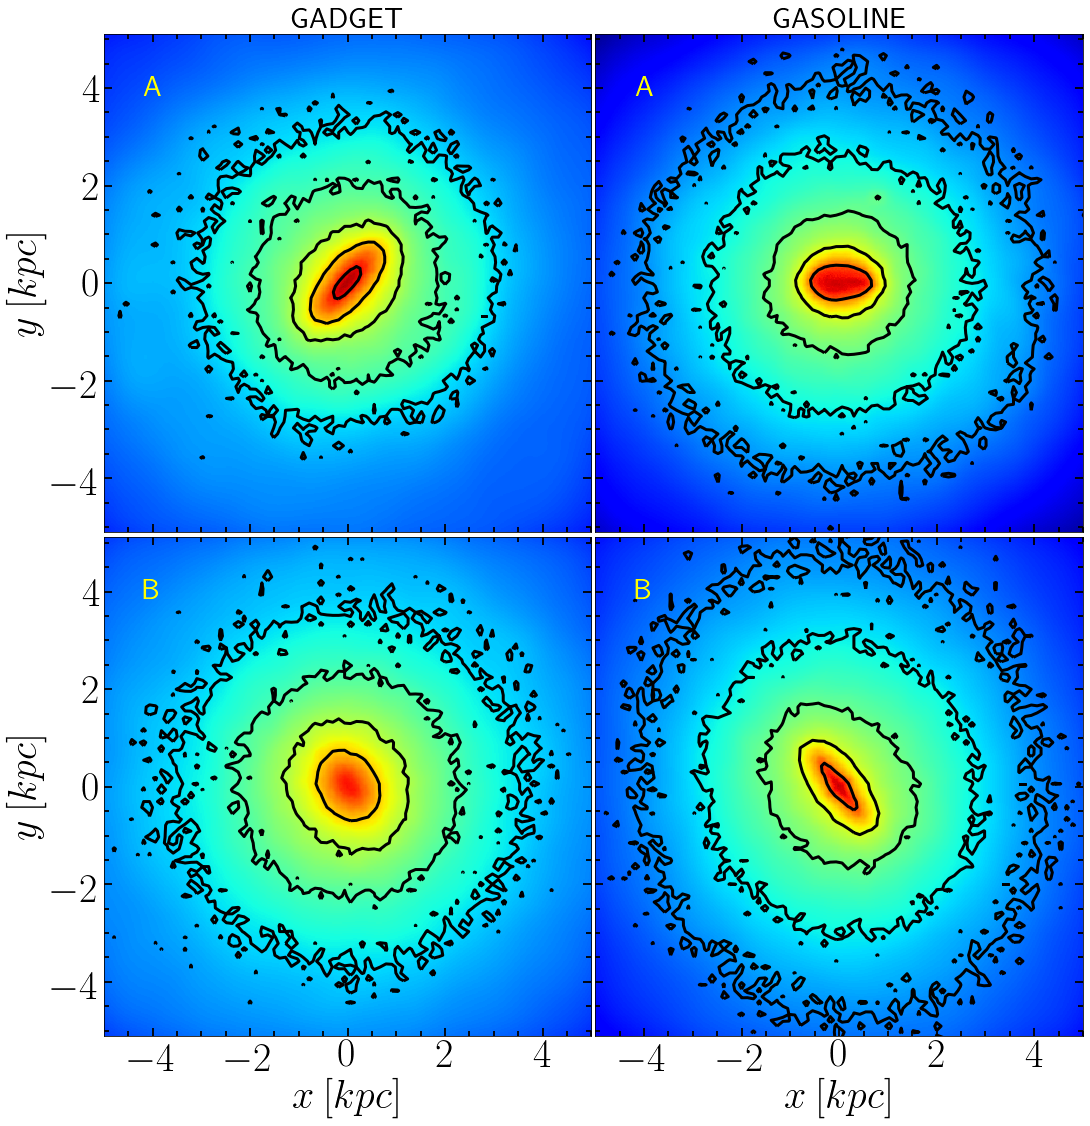

In [21]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
import matplotlib.patches as patches
from matplotlib.colors import LogNorm


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16), sharex=True )#sharey=True, sharex=True,
#                        gridspec_kw = {'height_ratios':[2,1,2,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.95, top = 0.95, wspace=0.008, hspace= 0.01)

particles=sph.Particles(M31_gd[:3,corte1],m_M31gd[corte1]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax[0,0]=fig.add_subplot(221)
ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,0].contour(count_M31gd,extent=[xedges_M31gd.min(),xedges_M31gd.max(),yedges_M31gd.min(),yedges_M31gd.max()], colors ='k',
            linewidths=3, norm=LogNorm(), levels =edges1)
ax[0,0].set_xlim(-5,5)
ax[0,0].set_ylim(-5,5)
ax[0,0].set_xticks([-4,-2,0,2,4])
ax[0,0].set_yticks([-4,-2,0,2,4])
# ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$y\:[kpc]$', fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,0].text(-4, 4,'A', fontsize=30, color='yellow', ha='center', va='center') 
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[0,0].set_title('GADGET', loc='center', fontsize=30)

#---------------------------------

particles=sph.Particles(M31_gs[:3,corte3],m_M31gs[corte3],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax=fig.add_subplot(222)
ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,1].contour(count_M31gs,extent=[xedges_M31gs.min(),xedges_M31gs.max(),yedges_M31gs.min(),yedges_M31gs.max()], colors ='k',
            linewidths=3, norm=LogNorm(), levels =edges1)
# ax[0,1].set_xlim(-5,5)
ax[0,1].set_ylim(-5,5)
# ax[0,1].set_xticks([-4,-2,0,2,4])
ax[0,1].set_yticks([-4,-2,0,2,4])
# ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,1].text(-4, 4,'A', fontsize=30, color='yellow', ha='center', va='center') 
ax[0,1].set_title('GASOLINE', loc='center', fontsize=30)

#---------------------------------

particles=sph.Particles(MW_gd[:3,corte2],m_MWgd[corte2]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax3=fig.add_subplot(223)
ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].contour(count_MWgd,extent=[xedges_MWgd.min(),xedges_MWgd.max(),yedges_MWgd.min(),yedges_MWgd.max()], colors ='k',
            linewidths=3, norm=LogNorm(), levels =edges1)
# ax[2,0].set_xlim(-5,5)
ax[1,0].set_ylim(-5,5)
# ax[2,0].set_xticks([-4,-2,0,2,4])
ax[1,0].set_yticks([-4,-2,0,2,4])
# ax[2,0].set_xticklabels([])
ax[1,0].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,0].set_ylabel('$y\:[kpc]$', fontsize=40)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[1,0].text(-4, 4,'B', fontsize=30, color='yellow', ha='center', va='center')

#---------------------------------

particles=sph.Particles(MW_gs[:3,corte4],m_MWgs[corte4],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax4=fig.add_subplot(224)
ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,1].contour(count_MWgs,extent=[xedges_MWgs.min(),xedges_MWgs.max(),yedges_MWgs.min(),yedges_MWgs.max()], colors ='k',
            linewidths=3, norm=LogNorm(), levels =edges1)
# ax[2,1].set_xlim(-5,5)
ax[1,1].set_ylim(-5,5)
# ax[2,1].set_xticks([-4,-2,0,2,4])
ax[1,1].set_yticks([-4,-2,0,2,4])
ax[1,1].set_yticklabels([])
ax[1,1].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[1,1].text(-4, 4,'B', fontsize=30, color='yellow', ha='center', va='center') 
# ax[1,1].plot(0,0,'k+', markersize=20, color='k')


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/isocontornos.pdf', dpi = 100, xxbox_inches='tight')
plt.show()


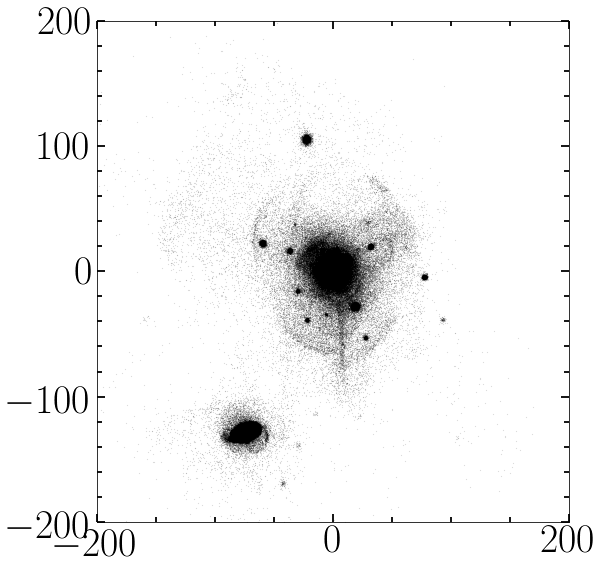

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.92, top = 0.95, wspace=0., hspace= 0)

# ax=fig.add_subplot(221)
ax.plot(x_M31gd,z_M31gd,'.', ms=0.1, color='k', label= 'Total')
ax.set_ylim(-200,200)
ax.set_xlim(-200,200)
ax.minorticks_on()
ax.tick_params( labelsize=40)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
